In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

In [5]:
data = pd.read_excel('data.xlsx')
data

,x,y
0,0,98
1,1,135
2,2,162
3,3,178
4,4,221
5,5,232
6,6,283
7,7,300
8,8,374
9,9,395


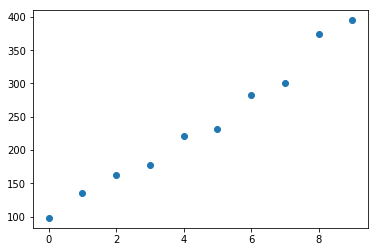

In [11]:
plt.scatter(data.x, data.y)

In [13]:
data['YSQR'] = np.sqrt(data["y"])

In [14]:
data

,x,y,YSQR
0,0,98,9.899495
1,1,135,11.618950
2,2,162,12.727922
3,3,178,13.341664
4,4,221,14.866069
5,5,232,15.231546
6,6,283,16.822604
7,7,300,17.320508
8,8,374,19.339080
9,9,395,19.874607


In [16]:
len(data)

10

In [30]:

#      Sum(X^2)Sum(Y) - Sum(X)Sum(XY) 
# b0 = ------------------------------
#         n Sum(X^2)  - Sum(X)^2
    
#      n Sum(XY) - Sum(X)Sum(Y)
# b1 = ------------------------------
#         n Sum(X^2)  - Sum(X)^2

## Yhat = b0 + b1 X

##Transforming Y --> Sqrt(Y)
## getting the linear regression funtion

X = data.x
y = data.YSQR
n = len(data)

SX2 = np.sum(X**2)
SX  = np.sum(X)
SY  = np.sum(y)
SXY = np.sum(X*y)

lower = n* SX2 - SX**2

b0 = ((SX2 * SY) - (SX*SXY)) / lower

b1 = (n*SXY - SX*SY) / lower

b0, b1

(10.260931495938804, 1.076291767499809)

In [34]:
## Same result from polynomial package
from numpy.polynomial.polynomial import polyfit
polyfit(X,y, 1)

array([10.2609315 ,  1.07629177])

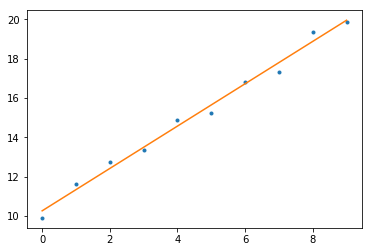

In [35]:
plt.plot(X,y, '.')
plt.plot(X, b0+b1*X)

In [38]:
## Obtain residuals
data['yhat'] = b0 + b1*X
data['e'] = data.YSQR - data.yhat
data

,x,y,YSQR,yhat,e
0,0,98,9.899495,10.260931,-0.361437
1,1,135,11.618950,11.337223,0.281727
2,2,162,12.727922,12.413515,0.314407
3,3,178,13.341664,13.489807,-0.148143
4,4,221,14.866069,14.566099,0.299970
5,5,232,15.231546,15.642390,-0.410844
6,6,283,16.822604,16.718682,0.103922
7,7,300,17.320508,17.794974,-0.474466
8,8,374,19.339080,18.871266,0.467814
9,9,395,19.874607,19.947557,-0.072950


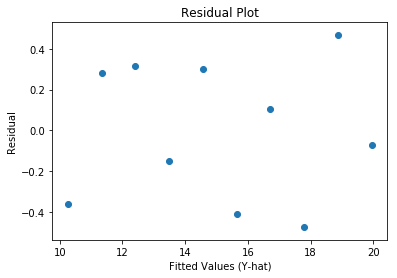

In [73]:
plt.title("Residual Plot")
plt.xlabel("Fitted Values (Y-hat)")
plt.ylabel("Residual")
plt.scatter(data.yhat, data.e)

##### Variability appear to be Fairly constant

## Normal Probability plot

In [46]:
import scipy.stats as st

In [63]:
SSE = np.sum( (data.YSQR - data.yhat)**2 )
MSE = SSE / (n-2)

data['i/n'] =  np.array(data.index / n)
data['z(i/n)'] = st.norm.ppf(data['i/n'])

data['Ordered_Res'] = np.sort(data.e)
data['Expected_Values']= data['z(i/n)'] * MSE

In [74]:
data

,x,y,YSQR,yhat,e,i/n,Ordered_Res,z(i/n),Expected_Values
0,0,98,9.899495,10.260931,-0.361437,0.0,-0.474466,-inf,-inf
1,1,135,11.618950,11.337223,0.281727,0.1,-0.410844,-1.281552,-0.168151
2,2,162,12.727922,12.413515,0.314407,0.2,-0.361437,-0.841621,-0.110428
3,3,178,13.341664,13.489807,-0.148143,0.3,-0.148143,-0.524401,-0.068806
4,4,221,14.866069,14.566099,0.299970,0.4,-0.072950,-0.253347,-0.033241
5,5,232,15.231546,15.642390,-0.410844,0.5,0.103922,0.000000,0.000000
6,6,283,16.822604,16.718682,0.103922,0.6,0.281727,0.253347,0.033241
7,7,300,17.320508,17.794974,-0.474466,0.7,0.299970,0.524401,0.068806
8,8,374,19.339080,18.871266,0.467814,0.8,0.314407,0.841621,0.110428
9,9,395,19.874607,19.947557,-0.072950,0.9,0.467814,1.281552,0.168151


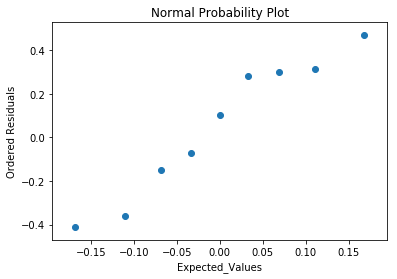

In [72]:
plt.title("Normal Probability Plot")
plt.xlabel("Expected_Values")
plt.ylabel("Ordered Residuals")
plt.scatter(data['Expected_Values'], data['Ordered_Res'])

######    <b style="color:red"> Correlation Coefficient</b> between Expected Values and Ordered Residual is high enough to prove that 
######    the <b style="color:red"> appropriatness </b>of Linear regression model of <b style="color:red">transformed Y </b>